In [3]:
import numpy as np
import os

import matplotlib.pyplot as plt

In [4]:
from scipy import signal


def butter_bandpass(data, lowcut, highcut, fs=200, order=4):
    nyq = fs * 0.5
    low = lowcut / nyq
    high = highcut / nyq
    b, a = signal.butter(order, [low, high], btype='bandpass')
    return signal.filtfilt(b, a, data)


def butter_lowpass(data, lowcut, fs=200, order=4):
    nyq = fs * 0.5
    low = lowcut / nyq
    b, a = signal.butter(order, low, btype='lowpass')
    return signal.filtfilt(b, a, data)


def butter_highpass(data, highcut, fs=200, order=4):
    nyq = fs * 0.5
    high = highcut / nyq
    b, a = signal.butter(order, high, btype='highpass')
    return signal.filtfilt(b, a, data)


def butter_notch(data, cutoff, var=1, fs=200, order=4):
    nyq = fs * 0.5
    low = (cutoff - var) / nyq
    high = (cutoff + var) / nyq
    b, a = signal.iirfilter(order, [low, high], btype='bandstop', ftype="butter")
    return signal.filtfilt(b, a, data)

## Carregando o Dataset

In [5]:
caminhos = [os.path.join("src", nome) for nome in os.listdir("src")]
print(caminhos)

['src/2_EMG_Claudia_25-11-2019_202532.npy', 'src/4_EMG_Claudia_25-11-2019_203206.npy', 'src/1_EMG_Claudia_25-11-2019_202406.npy', 'src/1_EMG_Claudia_25-11-2019_202048.npy', 'src/4_EMG_Claudia_25-11-2019_203111.npy', 'src/3_EMG_Claudia_25-11-2019_202949.npy', 'src/5_EMG_Claudia_25-11-2019_203540.npy']


In [6]:
dataset = [np.load(gesture) for gesture in caminhos]
dataset = np.array(dataset)

dataset = dataset.swapaxes(2,3)
print(dataset.shape)
print(dataset[0,0,0])

(7, 4, 4, 1400)
[-424.62076 -289.055   -308.2893  ... -419.484   -274.57224 -334.0516 ]


### Gesto , tentativas , eletrodos, dados

## Plotting

In [15]:
def filtering (dataset):
    
    
    for i in range(dataset.shape[1]):
        plt.plot(dataset[3,i,:])
    plt.show()
    
    #plt.plot(dataset[3,3,:])
    #plt.show()
    #plt.plot(dataset[3,3,0:256])
    #plt.show()
    data_filtered = []
    #data = dataset.swapaxes(1,2)
    #print("Segmento de 1400 dados original")
    #data0 = data
    #data0 = np.transpose(data0, (0, 2, 1))
    print(dataset.shape)
    #for i in range(data0.shape[1]):
    #    plt.plot(data0[3,i,:])
    #plt.show()
    
    data_filtered = butter_notch(dataset, 60)
    for i in range(data_filtered.shape[1]):
        plt.plot(data_filtered[3,i,:])
    plt.show()
    data_filtered = butter_highpass(data_filtered, 5)
    for i in range(data_filtered.shape[1]):
        plt.plot(data_filtered[3,i,:])
    plt.show()
    data_filtered = butter_lowpass(data_filtered, 50)
    for i in range(data_filtered.shape[1]):
        plt.plot(data_filtered[3,i,:])
    plt.show()
    
    '''
    print(dataset.shape)

    
    print("Amostra Filtro 1")
    data_filtered1 = butter_notch(dataset, 60)
    for i in range(data_filtered.shape[1]):
        plt.plot(data_filtered[3,i,:])
    plt.show()

    print("Amostra Filtro 2")  
    data_filtered2 = butter_notch(dataset, 60)
    for i in range(data_filtered.shape[1]):
        plt.plot(data_filtered[3,i,:])
    plt.show()
    

    

    data_filtered = butter_bandpass(data_filtered, 5, 50)
    for i in range(data_filtered.shape[1]):
        plt.plot(data_filtered[3,i,:])
    plt.show()'''



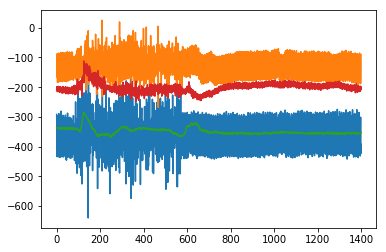

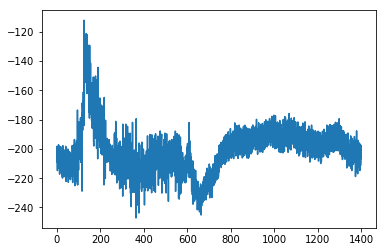

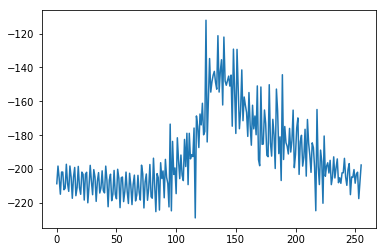

(4, 4, 1400)


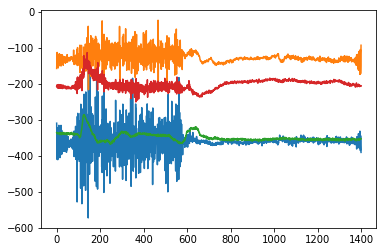

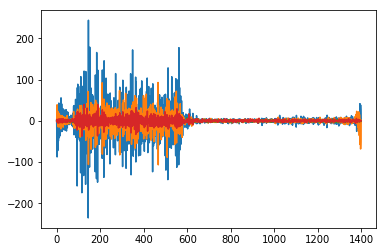

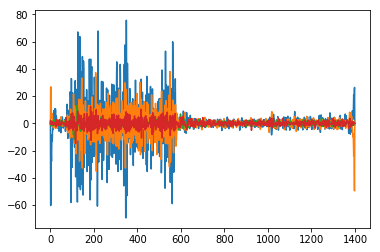

In [16]:
filtering(dataset[0])

## Segmentação

In [110]:
salto = 128
segmento = 256
print(data_filtered.shape)
n_win = int((data_filtered.shape[-1] - segmento) / salto) + 1
ids = np.arange(n_win) * salto
x = np.array([data_filtered[:,:,k:(k + segmento)] for k in ids]).transpose(1, 2, 0, 3)
x = np.reshape(4,4*9,1400)
print(x.shape)



(4, 4, 1400)


ValueError: cannot reshape array of size 1 into shape (36,)

## Pré Processing